# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
df = pd.DataFrame({"City": cities})
df["Lat"] = ""
df["Lng"] = ""
df["Country"] = ""
df["Date"] = ""
df["Max Temp (°F)"] = ""
df["Humidity (%)"] = ""
df["Cloudiness (%)"] = ""
df["Wind Speed (mph)"] = ""

base_url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
print("Beginning Data Retrieval")
print("------------------------")
for index, city in df.iterrows():
    cityname = city["City"]
    query_url = f"{base_url}appid={api_key}&q={cityname}&units={unit}"
    response = requests.get(query_url)
    city_weather = response.json()
    try:
        df.loc[index, "Lat"] = city_weather["coord"]["lat"]
        df.loc[index, "Lng"] = city_weather["coord"]["lon"]
        df.loc[index, "Country"] = city_weather["sys"]["country"]
        datetime = time.gmtime(city_weather["dt"])
        df.loc[index, "Date"] = f"{datetime[1]}/{datetime[2]}/{datetime[0]}"
        df.loc[index, "Max Temp (°F)"] = city_weather["main"]["temp_max"]
        df.loc[index, "Humidity (%)"] = city_weather["main"]["humidity"]
        df.loc[index, "Cloudiness (%)"] = city_weather["clouds"]["all"]
        df.loc[index, "Wind Speed (mph)"] = city_weather["wind"]["speed"]
        print(f"Processing Record {index+1} | {cityname}")
    except:
        df.loc[index, :] = np.nan
        print(f"City not found. Skipping ...")
        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 | port alfred
Processing Record 2 | nuuk
Processing Record 3 | sal rei
Processing Record 4 | klaksvik
Processing Record 5 | yellowknife
Processing Record 6 | bandarbeyla
Processing Record 7 | carnarvon
Processing Record 8 | sistranda
Processing Record 9 | sitka
Processing Record 10 | kadi
Processing Record 11 | kajaani
Processing Record 12 | upernavik
City not found. Skipping ...
Processing Record 14 | miranda de ebro
Processing Record 15 | hobart
Processing Record 16 | itaquitinga
Processing Record 17 | maumere
Processing Record 18 | syracuse
Processing Record 19 | vaini
City not found. Skipping ...
Processing Record 21 | sorland
Processing Record 22 | luena
Processing Record 23 | conceicao do mato dentro
Processing Record 24 | cockburn town
Processing Record 25 | codrington
Processing Record 26 | hilo
City not found. Skipping ...
Processing Record 28 | hermanus
City not found. Skipping ...
Processing Record 30 | ya

Processing Record 251 | talnakh
City not found. Skipping ...
Processing Record 253 | norman wells
Processing Record 254 | lukulu
Processing Record 255 | shamary
Processing Record 256 | pandan
Processing Record 257 | tiksi
Processing Record 258 | bambous virieux
Processing Record 259 | boa vista
City not found. Skipping ...
City not found. Skipping ...
Processing Record 262 | tautira
City not found. Skipping ...
Processing Record 264 | mitu
Processing Record 265 | camopi
Processing Record 266 | esperance
Processing Record 267 | tabas
Processing Record 268 | kuching
Processing Record 269 | simpang
Processing Record 270 | mildura
Processing Record 271 | mus
Processing Record 272 | roros
Processing Record 273 | tirumullaivasal
Processing Record 274 | eenhana
Processing Record 275 | vernon
Processing Record 276 | dwarka
Processing Record 277 | margate
Processing Record 278 | alikovo
Processing Record 279 | itarema
Processing Record 280 | tomatlan
Processing Record 281 | lagoa
Processing Rec

Processing Record 502 | placido de castro
Processing Record 503 | grand-santi
Processing Record 504 | tura
Processing Record 505 | panacan
Processing Record 506 | canico
Processing Record 507 | fuxin
Processing Record 508 | yumen
Processing Record 509 | mnogovershinnyy
Processing Record 510 | ust-koksa
City not found. Skipping ...
Processing Record 512 | aklavik
Processing Record 513 | narsaq
Processing Record 514 | loa janan
City not found. Skipping ...
Processing Record 516 | kieta
Processing Record 517 | fuerte olimpo
Processing Record 518 | togitsu
Processing Record 519 | la mesa
Processing Record 520 | jerusalem
Processing Record 521 | komatipoort
Processing Record 522 | tiarei
Processing Record 523 | carutapera
Processing Record 524 | pangai
Processing Record 525 | umm kaddadah
Processing Record 526 | rudnya
Processing Record 527 | sijunjung
Processing Record 528 | khuzhir
Processing Record 529 | mishkino
Processing Record 530 | kurumkan
Processing Record 531 | verkhoyansk
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = df.dropna(how="any")
df.to_csv(index=False, path_or_buf = output_data_file)
df.head()

,City,Lat,Lng,Country,Date,Max Temp (°F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,port alfred,-33.59,26.89,ZA,5/31/2019,54.93,78,100,1.92
1,nuuk,64.17,-51.74,GL,5/31/2019,46,70,49,5.01
2,sal rei,16.18,-22.92,CV,5/31/2019,73.4,78,75,16.11
3,klaksvik,62.23,-6.59,FO,5/31/2019,41,80,67,3.36
4,yellowknife,62.45,-114.38,CA,5/31/2019,41,65,20,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

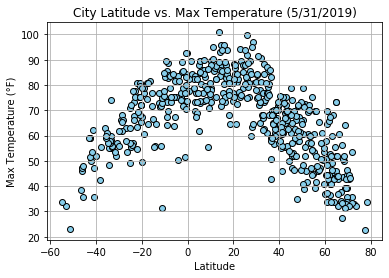

In [5]:
date = df.iloc[0, 4]
plt.scatter(df["Lat"], df["Max Temp (°F)"], color="skyblue", edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid()
plt.savefig("Images/city_lat_vs_max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

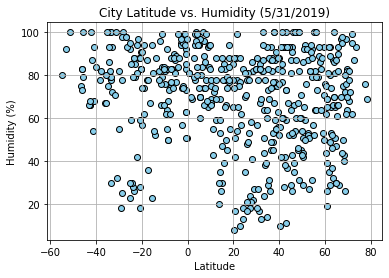

In [6]:
plt.scatter(df["Lat"], df["Humidity (%)"], color="skyblue", edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()
plt.savefig("Images/city_lat_vs_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

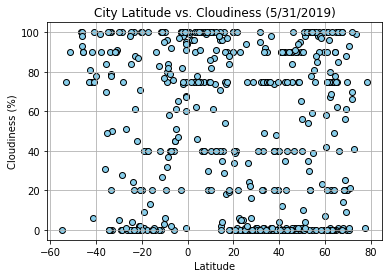

In [7]:
plt.scatter(df["Lat"], df["Cloudiness (%)"], color="skyblue", edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()
plt.savefig("Images/city_lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

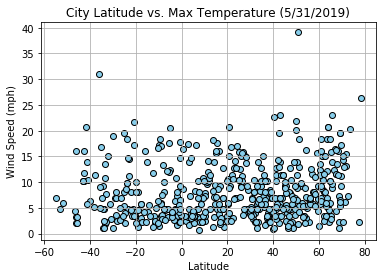

In [8]:
plt.scatter(df["Lat"], df["Wind Speed (mph)"], color="skyblue", edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid()
plt.savefig("Images/city_lat_vs_wind_speed.png")
plt.show()